## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_127835_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (65120, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts  er   pac        lng  \
0      GCBZT02500A231213036  2024-06-05 12:20:00 NaN  5.79  114.25642   
1      GCBZT02500A231213036  2024-06-05 12:25:00 NaN  4.70  114.25642   
2                       NaN                  NaN NaN   NaN        NaN   
3                       NaN                  NaN NaN   NaN        NaN   
4      GCBZT02500A231213036  2024-06-05 13:00:00 NaN  5.98  114.25642   
...                     ...                  ...  ..   ...        ...   
65115  GCBZT02500A231213036  2025-05-10 19:05:00 NaN  0.01  114.25642   
65116  GCBZT02500A231213036  2025-05-10 19:10:00 NaN  0.00  114.25642   
65117  GCBZT02500A231213036  2025-05-10 19:15:00 NaN  0.00  114.25642   
65118  GCBZT02500A231213036  2025-05-10 19:20:00 NaN  0.00  114.25642   
65119  GCBZT02500A231213036  2025-05-10 19:25:00 NaN  0.00  114.25642   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   
1      30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   
2           NaN       NaN    NaN         21.8922               73.0676  ...   
3           NaN       NaN    NaN         22.0617               72.7443  ...   
4      30.22666     斜屋顶双坡   15.0         22.3027               72.2035  ...   
...         ...       ...    ...             ...                   ...  ...   
65115  30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   
65116  30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   
65117  30.22666     斜屋顶双坡   15.0         17.5288               68.0193  ...   
65118  30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   
65119  30.22666     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                           NaN                NaN             NaN   
2                      220.6178           364.0152          1.7105   
3                      278.4055           357.9152          1.6177   
4                      307.7560           352.1624          1.5248   
...                         ...                ...             ...   
65115                       NaN                NaN             NaN   
65116                       NaN                NaN             NaN   
65117                    0.0000             1.0854          1.8438   
65118                       NaN                NaN             NaN   
65119                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1                 NaN              NaN                 NaN   
2              2.0714           2.1503             96.5741   
3              1.9403           2.0104             95.9173   
4              1.8112           1.8731             94.4473   
...               ...              ...                 ...   
65115             NaN              NaN                 NaN   
65116             NaN              NaN                 NaN   
65117          3.9840           4.6301            224.2072   
65118             NaN              NaN                 NaN   
65119             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                     NaN                  NaN                  NaN   
2                 96.5592              96.5642  2024-06-05 12:30:00   
3                 96.3310              96.5289  2024-06-05 12:45:00   
4                 95.2183              95.5792  2024-06-05 13:00:00   
...                   ...                  ...                  ...   
65115                 NaN                  NaN                  NaN   
65116                 NaN                  Na

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                    sn                   ts  er  \
0     2024-06-05 12:20:00  GCBZT02500A231213036  2024-06-05 12:20:00 NaN   
1     2024-06-05 12:25:00  GCBZT02500A231213036  2024-06-05 12:25:00 NaN   
2     2024-06-05 12:30:00                   NaN                  NaN NaN   
3     2024-06-05 12:35:00                   NaN                  NaN NaN   
4     2024-06-05 12:40:00                   NaN                  NaN NaN   
...                   ...                   ...                  ...  ..   
97713 2025-05-10 19:05:00  GCBZT02500A231213036  2025-05-10 19:05:00 NaN   
97714 2025-05-10 19:10:00  GCBZT02500A231213036  2025-05-10 19:10:00 NaN   
97715 2025-05-10 19:15:00  GCBZT02500A231213036  2025-05-10 19:15:00 NaN   
97716 2025-05-10 19:20:00  GCBZT02500A231213036  2025-05-10 19:20:00 NaN   
97717 2025-05-10 19:25:00  GCBZT02500A231213036  2025-05-10 19:25:00 NaN   

        pac        lng       lat roof_type  angle  temperature_2m  ...  \
0      5.79  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
1      4.70  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
2       NaN        NaN       NaN       NaN    NaN         21.8922  ...   
3       NaN        NaN       NaN       NaN    NaN             NaN  ...   
4       NaN        NaN       NaN       NaN    NaN             NaN  ...   
...     ...        ...       ...       ...    ...             ...  ...   
97713  0.01  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
97714  0.00  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
97715  0.00  114.25642  30.22666     斜屋顶双坡   15.0         17.5288  ...   
97716  0.00  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
97717  0.00  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1                   NaN                       NaN                NaN   
2              211.2677                  220.6178           364.0152   
3                   NaN                       NaN                NaN   
4                   NaN                       NaN                NaN   
...                 ...                       ...                ...   
97713               NaN                       NaN                NaN   
97714               NaN                       NaN                NaN   
97715            0.0000                    0.0000             1.0854   
97716               NaN                       NaN                NaN   
97717               NaN                       NaN                NaN   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1                 NaN             NaN              NaN                 NaN   
2              1.7105          2.0714           2.1503             96.5741   
3                 NaN             NaN              NaN                 NaN   
4                 NaN             NaN              NaN                 NaN   
...               ...             ...              ...                 ...   
97713             NaN             NaN              NaN                 NaN   
97714             NaN             NaN              NaN                 NaN   
97715          1.8438          3.9840           4.6301            224.2072   
97716             NaN             NaN              NaN                 NaN   
97717             NaN             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                     NaN                  NaN                  NaN  
2                 96.5592              96.5642  2024-06-05 12:30:00  
3                     NaN                  NaN                  NaN  
4                     NaN                  NaN                

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,    12,
        ...
        97541, 97542, 97543, 97544, 97545, 97546, 97547, 97548, 97549, 97653],
       dtype='int64', length=48902),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,    12,
        ...
        97541, 97542, 97543, 97544, 97545, 97546, 97547, 97548, 97549, 97653],
       dtype='int64', length=48902),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(RangeIndex(start=0, stop=97718, step=1), True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,    12,
        ...
        97541, 97542, 97543, 97544, 97545, 97546, 97547, 97548, 97549, 97653],
       dtype='int64', length=48902),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    2,     3,     4,     5,     6,     7,     9,    10,    11,    12,
        ...
        97541, 97542, 97543, 97544, 97545, 97546, 97547, 97548, 97549, 97653],
       dtype='int64', length=48902),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([    0,     1,     3,     4,     6,     7,     9,    10,    12,    13,
        ...
        97704, 97705, 97707, 97708, 97710, 97711, 97713, 97714, 97716, 97717],
       dtype='int64', length=65146),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                    sn                   ts   er  \
0     2024-06-05 12:20:00  GCBZT02500A231213036  2024-06-05 12:20:00  0.0   
1     2024-06-05 12:25:00  GCBZT02500A231213036  2024-06-05 12:25:00  0.0   
2     2024-06-05 12:30:00  GCBZT02500A231213036  2024-06-05 12:30:00  0.0   
3     2024-06-05 12:35:00  GCBZT02500A231213036  2024-06-05 12:35:00  0.0   
4     2024-06-05 12:40:00  GCBZT02500A231213036  2024-06-05 12:40:00  0.0   
...                   ...                   ...                  ...  ...   
97713 2025-05-10 19:05:00  GCBZT02500A231213036  2025-05-10 19:05:00  0.0   
97714 2025-05-10 19:10:00  GCBZT02500A231213036  2025-05-10 19:10:00  0.0   
97715 2025-05-10 19:15:00  GCBZT02500A231213036  2025-05-10 19:15:00  0.0   
97716 2025-05-10 19:20:00  GCBZT02500A231213036  2025-05-10 19:20:00  0.0   
97717 2025-05-10 19:25:00  GCBZT02500A231213036  2025-05-10 19:25:00  0.0   

        pac        lng       lat roof_type  angle  temperature_2m  ...  \
0      5.79  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
1      4.70  114.25642  30.22666     斜屋顶双坡   15.0             NaN  ...   
2      0.00  114.25642  30.22666     斜屋顶双坡   15.0       21.892200  ...   
3      0.00  114.25642  30.22666     斜屋顶双坡   15.0       21.948700  ...   
4      0.00  114.25642  30.22666     斜屋顶双坡   15.0       22.005200  ...   
...     ...        ...       ...       ...    ...             ...  ...   
97713  0.01  114.25642  30.22666     斜屋顶双坡   15.0       17.724667  ...   
97714  0.00  114.25642  30.22666     斜屋顶双坡   15.0       17.626733  ...   
97715  0.00  114.25642  30.22666     斜屋顶双坡   15.0       17.528800  ...   
97716  0.00  114.25642  30.22666     斜屋顶双坡   15.0       17.528800  ...   
97717  0.00  114.25642  30.22666     斜屋顶双坡   15.0       17.528800  ...   

       direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                   NaN                       NaN                NaN   
1                   NaN                       NaN                NaN   
2              211.2677                220.617800         364.015200   
3              229.2866                239.880367         361.981867   
4              247.3055                259.142933         359.948533   
...                 ...                       ...                ...   
97713            0.0000                  0.000000           2.532600   
97714            0.0000                  0.000000           1.809000   
97715            0.0000                  0.000000           1.085400   
97716            0.0000                  0.000000           1.085400   
97717            0.0000                  0.000000           1.085400   

       wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN             NaN              NaN                 NaN   
1                 NaN             NaN              NaN                 NaN   
2            1.710500        2.071400         2.150300           96.574100   
3            1.679567        2.027700         2.103667           96.355167   
4            1.648633        1.984000         2.057033           96.136233   
...               ...             ...              ...                 ...   
97713        1.822200        3.912333         4.541433          226.398000   
97714        1.833000        3.948167         4.585767          225.302600   
97715        1.843800        3.984000         4.630100          224.207200   
97716        1.843800        3.984000         4.630100          224.207200   
97717        1.843800        3.984000         4.630100          224.207200   

       wind_direction_80m  wind_direction_120m        variable_date  
0                     NaN                  NaN                  NaN  
1                     NaN                  NaN                  NaN  
2               96.559200            96.564200  2024-06-05 12:30:00  
3               96.483133            96.552433                  NaN  
4               96.407067            96.540667    

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0, 1], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=97718, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                    sn  \
ts                                                              
2024-06-05 12:20:00 2024-06-05 12:20:00  GCBZT02500A231213036   
2024-06-05 12:25:00 2024-06-05 12:25:00  GCBZT02500A231213036   
2024-06-05 12:30:00 2024-06-05 12:30:00  GCBZT02500A231213036   
2024-06-05 12:35:00 2024-06-05 12:35:00  GCBZT02500A231213036   
2024-06-05 12:40:00 2024-06-05 12:40:00  GCBZT02500A231213036   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213036   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213036   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213036   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213036   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213036   

                                     ts   er   pac        lng       lat  \
ts                                                                        
2024-06-05 12:20:00 2024-06-05 12:20:00  0.0  5.79  114.25642  30.22666   
2024-06-05 12:25:00 2024-06-05 12:25:00  0.0  4.70  114.25642  30.22666   
2024-06-05 12:30:00 2024-06-05 12:30:00  0.0  0.00  114.25642  30.22666   
2024-06-05 12:35:00 2024-06-05 12:35:00  0.0  0.00  114.25642  30.22666   
2024-06-05 12:40:00 2024-06-05 12:40:00  0.0  0.00  114.25642  30.22666   
...                                 ...  ...   ...        ...       ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  114.25642  30.22666   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.25642  30.22666   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-06-05 12:20:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-05 12:25:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-06-05 12:30:00     斜屋顶双坡   15.0       21.892200  ...          211.2677   
2024-06-05 12:35:00     斜屋顶双坡   15.0       21.948700  ...          229.2866   
2024-06-05 12:40:00     斜屋顶双坡   15.0       22.005200  ...          247.3055   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.724667  ...            0.0000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.626733  ...            0.0000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.528800  ...            0.0000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.528800  ...            0.0000   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.528800  ...            0.0000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-06-05 12:20:00                       NaN                NaN   
2024-06-05 12:25:00                       NaN                NaN   
2024-06-05 12:30:00                220.617800         364.015200   
2024-06-05 12:35:00                239.880367         361.981867   
2024-06-05 12:40:00                259.142933         359.948533   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   
2025-05-10 19:25:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-06-05 12:20:00             NaN             NaN              NaN   
2024-06-05 12:25:00             NaN             NaN              NaN   
2024-06

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                    sn  \
2024-06-05 12:20:00 2024-06-05 12:20:00  GCBZT02500A231213036   
2024-06-05 12:25:00 2024-06-05 12:25:00  GCBZT02500A231213036   
2024-06-05 12:30:00 2024-06-05 12:30:00  GCBZT02500A231213036   
2024-06-05 12:35:00 2024-06-05 12:35:00  GCBZT02500A231213036   
2024-06-05 12:40:00 2024-06-05 12:40:00  GCBZT02500A231213036   
...                                 ...                   ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  GCBZT02500A231213036   
2025-05-10 19:10:00 2025-05-10 19:10:00  GCBZT02500A231213036   
2025-05-10 19:15:00 2025-05-10 19:15:00  GCBZT02500A231213036   
2025-05-10 19:20:00 2025-05-10 19:20:00  GCBZT02500A231213036   
2025-05-10 19:25:00 2025-05-10 19:25:00  GCBZT02500A231213036   

                                     ts   er   pac        lng       lat  \
2024-06-05 12:20:00 2024-06-05 12:20:00  0.0  5.79  114.25642  30.22666   
2024-06-05 12:25:00 2024-06-05 12:25:00  0.0  4.70  114.25642  30.22666   
2024-06-05 12:30:00 2024-06-05 12:30:00  0.0  0.00  114.25642  30.22666   
2024-06-05 12:35:00 2024-06-05 12:35:00  0.0  0.00  114.25642  30.22666   
2024-06-05 12:40:00 2024-06-05 12:40:00  0.0  0.00  114.25642  30.22666   
...                                 ...  ...   ...        ...       ...   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0  0.01  114.25642  30.22666   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0  0.00  114.25642  30.22666   
2025-05-10 19:25:00 2025-05-10 19:25:00  0.0  0.00  114.25642  30.22666   

                    roof_type  angle  temperature_2m  ...  \
2024-06-05 12:20:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-05 12:25:00     斜屋顶双坡   15.0             NaN  ...   
2024-06-05 12:30:00     斜屋顶双坡   15.0       21.892200  ...   
2024-06-05 12:35:00     斜屋顶双坡   15.0       21.948700  ...   
2024-06-05 12:40:00     斜屋顶双坡   15.0       22.005200  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.724667  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.626733  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.528800  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.528800  ...   
2025-05-10 19:25:00     斜屋顶双坡   15.0       17.528800  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-06-05 12:20:00                       NaN                NaN   
2024-06-05 12:25:00                       NaN                NaN   
2024-06-05 12:30:00                220.617800         364.015200   
2024-06-05 12:35:00                239.880367         361.981867   
2024-06-05 12:40:00                259.142933         359.948533   
...                                       ...                ...   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   
2025-05-10 19:25:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-06-05 12:20:00             NaN             NaN              NaN   
2024-06-05 12:25:00             NaN             NaN              NaN   
2024-06-05 12:30:00        1.710500        2.071400         2.150300   
2024-06-05 12:35:00        1.679567        2.027700         2.103667   
2024-06-05 12:40:00        1.648633        1.984000         2.057033   
...                             ...             ...              ...   
2025-05-10 19:05:00        1.822200        3.912333         4.541433   
2025-05-10 19:10:00        1.833000        3.948167         4.585767   
2025-05-10 19:15:00        1.843800        3.984000         4.630100   
2025-05-10 19:20:00        1.843800        3.984000         4.630100   
2025-0

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-06-05 12:20:00', '2024-06-05 12:25:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(97718, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.430363
1        relative_humidity_2m    70.798503
2                dew_point_2m    12.545950
3                pressure_msl  1015.587396
4            surface_pressure  1011.191911
5   precipitation_probability    11.566938
6                 cloud_cover    57.273190
7             cloud_cover_low    14.014006
8             cloud_cover_mid    30.931751
9            cloud_cover_high    35.514944
10        shortwave_radiation   163.880711
11           direct_radiation    94.318134
12   direct_normal_irradiance   147.897444
13          diffuse_radiation    69.562577
14             wind_speed_10m     2.511661
15             wind_speed_80m     4.138104
16            wind_speed_120m     4.595103
17         wind_direction_10m   142.090281
18         wind_direction_80m   141.625598
19        wind_direction_120m   141.378657
20                   pac_copy     2.479954

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     98.073530
1        relative_humidity_2m    341.035975
2                dew_point_2m    102.346799
3                pressure_msl    109.885217
4            surface_pressure    106.213826
5   precipitation_probability    861.334436
6                 cloud_cover   1783.134033
7             cloud_cover_low    844.952931
8             cloud_cover_mid   1604.121349
9            cloud_cover_high   1716.009836
10        shortwave_radiation  55797.713951
11           direct_radiation  27766.858312
12   direct_normal_irradiance  51719.427689
13          diffuse_radiation   7906.656430
14             wind_speed_10m      2.043425
15             wind_speed_80m      4.341449
16            wind_speed_120m      5.267822
17         wind_direction_10m   9733.772704
18         wind_direction_80m   9504.591353
19        wind_direction_120m   9468.900161
20                   pac_copy     15.782498

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.903208
1        relative_humidity_2m           18.467159
2                dew_point_2m           10.116659
3                pressure_msl           10.482615
4            surface_pressure           10.306009
5   precipitation_probability           29.348500
6                 cloud_cover           42.227172
7             cloud_cover_low           29.068074
8             cloud_cover_mid           40.051484
9            cloud_cover_high           41.424749
10        shortwave_radiation          236.215397
11           direct_radiation          166.633905
12   direct_normal_irradiance          227.419057
13          diffuse_radiation           88.919382
14             wind_speed_10m            1.429484
15             wind_speed_80m            2.083614
16            wind_speed_120m            2.295174
17         wind_direction_10m           98.659884
18         wind_direction_80m           97.491494
19        wind_direction_120m           97.308274
20                   pac_copy            3.972719

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    38.8010
1        relative_humidity_2m    99.9663
2                dew_point_2m    28.5326
3                pressure_msl  1040.8010
4            surface_pressure  1036.0630
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.2227
11           direct_radiation   737.8847
12   direct_normal_irradiance   790.8193
13          diffuse_radiation   389.6253
14             wind_speed_10m    10.1884
15             wind_speed_80m    15.4503
16            wind_speed_120m    16.7571
17         wind_direction_10m   358.7980
18         wind_direction_80m   358.3558
19        wind_direction_120m   358.6706
20                   pac_copy    18.9400

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.7721
1        relative_humidity_2m    16.2974
2                dew_point_2m   -16.5550
3                pressure_msl   991.3342
4            surface_pressure   987.2639
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0758
15             wind_speed_80m     0.1567
16            wind_speed_120m     0.1584
17         wind_direction_10m     2.0735
18         wind_direction_80m     1.4838
19        wind_direction_120m     2.0312
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    19.041950
1        relative_humidity_2m    72.816450
2                dew_point_2m    13.242417
3                pressure_msl  1016.148800
4            surface_pressure  1011.754467
5   precipitation_probability     0.000000
6                 cloud_cover    72.669667
7             cloud_cover_low     0.008900
8             cloud_cover_mid     5.684500
9            cloud_cover_high     8.059067
10        shortwave_radiation    14.614500
11           direct_radiation     0.749300
12   direct_normal_irradiance     3.482067
13          diffuse_radiation    11.554633
14             wind_speed_10m     2.178950
15             wind_speed_80m     3.903650
16            wind_speed_120m     4.359217
17         wind_direction_10m   114.748267
18         wind_direction_80m   116.380583
19        wind_direction_120m   116.551600
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       12.617000             62.977933      6.821478   1008.603722   
0.666667       24.558833             81.910622     19.305867   1021.965533   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1004.355278                        0.0    20.986300   
0.666667       1017.443933                        0.0    98.150022   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.099400          0.004300  ...   
0.666667         3.144744        31.967856         57.249522  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333            0.0000                  0.000000           0.000000   
0.666667           36.0931                100.380222          99.119022   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.761800        3.000667         3.330422           78.959156   
0.666667        2.805578        4.849611         5.451944          192.753022   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           79.801589            79.685511      0.00  
0.666667          193.805933           194.037956      1.69  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.109349      0.898001   
relative_humidity_2m            -0.109349              1.000000      0.333086   
dew_point_2m                     0.898001              0.333086      1.000000   
pressure_msl                    -0.880081             -0.154211     -0.899055   
surface_pressure                -0.876785             -0.157726     -0.897464   
precipitation_probability        0.038380              0.297688      0.160867   
cloud_cover                      0.005361              0.135206      0.066339   
cloud_cover_low                 -0.127337              0.308898      0.006992   
cloud_cover_mid                 -0.229075              0.098875     -0.167105   
cloud_cover_high                 0.254806              0.071994      0.271441   
shortwave_radiation              0.365354             -0.481627      0.127452   
direct_radiation                 0.347771             -0.470092      0.113499   
direct_normal_irradiance         0.293424             -0.505301      0.044439   
diffuse_radiation                0.318847             -0.398502      0.125881   
wind_speed_10m                   0.248954             -0.252607      0.129221   
wind_speed_80m                   0.118583             -0.110416      0.073057   
wind_speed_120m                  0.084875             -0.076230      0.056972   
wind_direction_10m               0.068794              0.082229      0.091891   
wind_direction_80m               0.081508              0.074122      0.101097   
wind_direction_120m              0.089231              0.072194      0.107494   
pac_copy                         0.353211             -0.531254      0.090292   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.880081         -0.876785   
relative_humidity_2m          -0.154211         -0.157726   
dew_point_2m                  -0.899055         -0.897464   
pressure_msl                   1.000000          0.999976   
surface_pressure               0.999976          1.000000   
precipitation_probability     -0.149170         -0.150479   
cloud_cover                   -0.066581         -0.067275   
cloud_cover_low                0.056007          0.054932   
cloud_cover_mid                0.170740          0.169699   
cloud_cover_high              -0.303759         -0.303902   
shortwave_radiation           -0.136360         -0.132879   
direct_radiation              -0.124460         -0.121102   
direct_normal_irradiance      -0.066039         -0.062708   
diffuse_radiation             -0.129006         -0.126051   
wind_speed_10m                -0.153177         -0.151530   
wind_speed_80m                -0.106446         -0.106091   
wind_speed_120m               -0.092019         -0.091969   
wind_direction_10m            -0.126009         -0.126636   
wind_direction_80m            -0.147752         -0.148465   
wind_direction_120m           -0.155879         -0.156583   
pac_copy                      -0.115470         -0.111903   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.038380     0.005361   
relative_humidity_2m                        0.297688     0.135206   
dew_point_2m                                0.160867     0.066339   
pressure_msl                               -0.149170    -0.066581   
surface_pressure                           -0.150479    -0.067275   
precipitation_probability                   1.000000     0.325750   
cloud_cover                                 0.325750     1.000000   
cloud_cover_low                             0.376265     0.378081   
cloud_cover_mid                             0.418183     0.630972   
cloud_cover_high                            0.217971     0.662754   
shortwave_radiation                        -0.070005    -0.137049   
direct_radiation                           -0.114377    -0.250166   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.870549
1        relative_humidity_2m          0.076983
2                dew_point_2m          0.970478
3                pressure_msl          0.973441
4            surface_pressure          0.973290
5   precipitation_probability          0.400126
6                 cloud_cover          0.532055
7             cloud_cover_low          0.508721
8             cloud_cover_mid          0.575925
9            cloud_cover_high          0.518140
10        shortwave_radiation         -0.336715
11           direct_radiation         -0.235825
12   direct_normal_irradiance         -0.212318
13          diffuse_radiation         -0.380132
14             wind_speed_10m          0.552632
15             wind_speed_80m          0.576476
16            wind_speed_120m          0.543428
17         wind_direction_10m          0.402108
18         wind_direction_80m          0.426957
19        wind_direction_120m          0.433457
20                   pac_copy         -0.280298

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 64714.17712224,  71920.0765612 , 166297.7337836 ]),
 'fft_periods': array([287, 143, 288])}

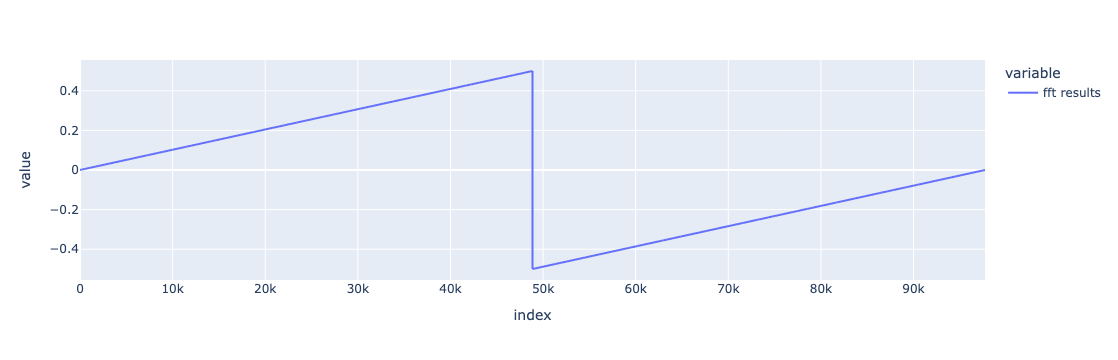

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -38.62475837253188,
  'P-value': 0.0,
  'Lags': np.int64(52),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -38.625
  P-value                         0.000
  Lags                               52
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-41.48192837576443),
  'P-value': 0.0,
  'Lags': 68,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -41.482
  P-value                         0.000
  Lags                               68
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -26.035989361078016,
  'P-value': 0.0,
  'Lags': np.int64(52),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -26.036
  P-value                         0.000
  Lags                               52
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}